This script demonstrates the image denoising

Student ID : 2018120203

Name : So-Jeong An

Project : Github Link : https://github.com/SojeongAn/Assignment11

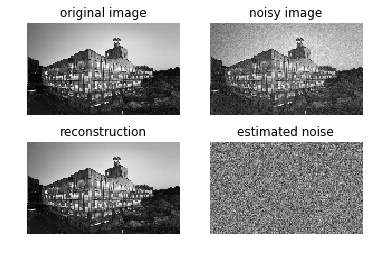

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
from scipy.sparse import spdiags
from scipy.sparse import dia_matrix

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

# $ I + \sqrt{\lambda} Dx + \sqrt{\lambda} Dy $

# Make Identity

In [3]:
I = np.identity(row*col)

# Make $ Dx $

In [4]:
def makingDx(matrix):
    makingmatrix = np.empty((row*(col-1), row*col), dtype=int)
    for i in range(0, (row*(col-1))):
        for j in range(0, row*col):
            if(i == j):
                makingmatrix[i][j] = -1
            elif(i+col+1 == j):
                makingmatrix[i][j] = 1
            else:
                makingmatrix[i][j] = 0
        return makingmatrix
Dx = makingDx(im_noise)

# Make $ Dy $

In [5]:
def makingDy(matrix):
    makingmatrix = np.empty(((row-1)*col, row*col), dtype=int)
    for i in range(0,(row-1)*col):
        for j in range(0, row*col):
            if ((i%col)==0) & (i != 0):
                break
            elif(i==j):
                makingmatrix[i][j] = -1
            elif(j==(i+1)):
                makingmatrix[i][j] = 1
            else:
                makingmatrix[i][j] = 0
    return makingmatrix
Dy = makingDy(im_noise)
#rDy = 

# Y -> U

In [6]:
u = [y for x in im_noise for y in x]
u = np.mat(u)
u = u.T

In [7]:
zero = np.zeros((22522, 1))
axisy = np.concatenate((u, zero))

# Least Square Approximation: $ W = (X^T X)^{-1} X^T y $ 

In [8]:
def computeApproximation(vecX,vecY):
    vecX = np.mat(vecX)
    vecY = np.mat(vecY).T
    xTx = vecX.T * vecX
    if(np.linalg.det(xTx) == 0.0): # if Singular function, return 
        print("This matrix is singular")
        return
    weight = xTx.I * (vecX.T * vecY) # weight
    return weight

# Train

In [9]:
def train(Identity, Dh, Dv, lamda, y):
    lDh = np.sqrt(lamda) * Dh
    IDv = np.sqrt(lamda) * Dv
    A = np.empty((33893, 11371), dtype = float)
    A = np.concatenate((Identity, lDh, IDv), axis=0)
    dd = computeApproximation(A, y)
    return dd

In [10]:
result1 = train(I, Dx, Dy, 1, axisy.T) # Lambda = 1
result2 = train(I, Dx, Dy, 10**(-2), axisy.T) # Lambda = 10^-2
result3 = train(I, Dx, Dy, 10**(-4), axisy.T) # Lambda = 10^-4
result4 = train(I, Dx, Dy, 10**(-6), axisy.T) # Lambda = 10^-6

C:\Users\My\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1874: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [11]:
resultImage1 = np.reshape(result1, (83, 137))
resultImage2 = np.reshape(result2, (83, 137))
resultImage3 = np.reshape(result3, (83, 137))
resultImage4 = np.reshape(result4, (83, 137))

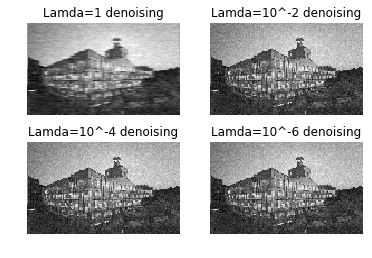

In [12]:
p1 = plt.subplot(2,2,1)
p1.set_title('Lamda=1 denoising')
plt.imshow(resultImage1, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('Lamda=10^-2 denoising')
plt.imshow(resultImage2, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('Lamda=10^-4 denoising')
plt.imshow(resultImage3, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('Lamda=10^-6 denoising')
plt.imshow(resultImage4, cmap='gray')
plt.axis('off')

plt.show()

# Error

In [14]:
error1 = np.linalg.norm(im - resultImage1)
print("Lamda=1 denoising error : ", error1)
error2 = np.linalg.norm(im - resultImage2)
print("Lamda=10^-2 denoising error : ", error2)
error3 = np.linalg.norm(im - resultImage3)
print("Lamda=10^-4 denoising error : ", error3)
error4 = np.linalg.norm(im - resultImage4)
print("Lamda=10^-6 denoising error : ", error4)


Lamda=1 denoising error :  25.288349553294815
Lamda=10^-2 denoising error :  20.97148376747969
Lamda=10^-4 denoising error :  21.35871070478436
Lamda=10^-6 denoising error :  21.362884842233324
